2026-01-08 17:40:42.893 | INFO     | src.data.csv_data_feed:__init__:43 - Loading CSV data from C:\Users\rdpuser\projects\trading-bot\trading-bot\data\GBPJPY._M15_2025-12-01_2026-01-08.csv
2026-01-08 17:40:42.933 | INFO     | src.data.csv_data_feed:__init__:52 - Loaded 2514 rows from CSV
2026-01-08 17:40:42.934 | INFO     | src.data.csv_data_feed:__init__:53 - Date range: 2025-12-01 11:15:00 to 2026-01-08 15:30:00
2026-01-08 17:40:42.939 | INFO     | src.data.csv_data_feed:__init__:114 - Limiting data to last 300 candlesticks (from 2514 total)


symbols_list: [{'symbol': 'GBPJPY', 'csv_file': WindowsPath('C:/Users/rdpuser/projects/trading-bot/trading-bot/data/GBPJPY._M15_2025-12-01_2026-01-08.csv')}]
Data Summary:
  GBPJPY:
    CSV File: C:\Users\rdpuser\projects\trading-bot\trading-bot\data\GBPJPY._M15_2025-12-01_2026-01-08.csv
    Total rows: 300
    Data range: 2026-01-05 12:45:00 to 2026-01-08 15:30:00
    Price range: 210.28800 to 212.13800

2026-01-05 22:30: PENDING  BUY(0) [GBPJPY] Entry: 211.5520100, Size: 6943, TP: 211.8400500, SL: 211.3879900, Risk: 1000.0000000 Cash: 100000
2026-01-06 01:30: PENDING  BUY(12) [GBPJPY] Entry: 211.8050100, Size: 4064, TP: 212.2970500, SL: 211.5389900, Risk: 1000.0000000 Cash: 100000
2026-01-06 03:15: CANCELLED  BUY(19) [GBPJPY] Invalidated BUY trade 8dadd7dc-98a8-44c9-b6c5-f2761a1a29cb due to new support 211.8609900 Cash: 100000
2026-01-06 03:15: CANCELLED  BUY(19) [GBPJPY] Invalidated BUY trade 9bdedb0f-a0fe-47e4-92ec-e0802dd5338d due to new support 211.8609900 Cash: 100000
2026-01-06

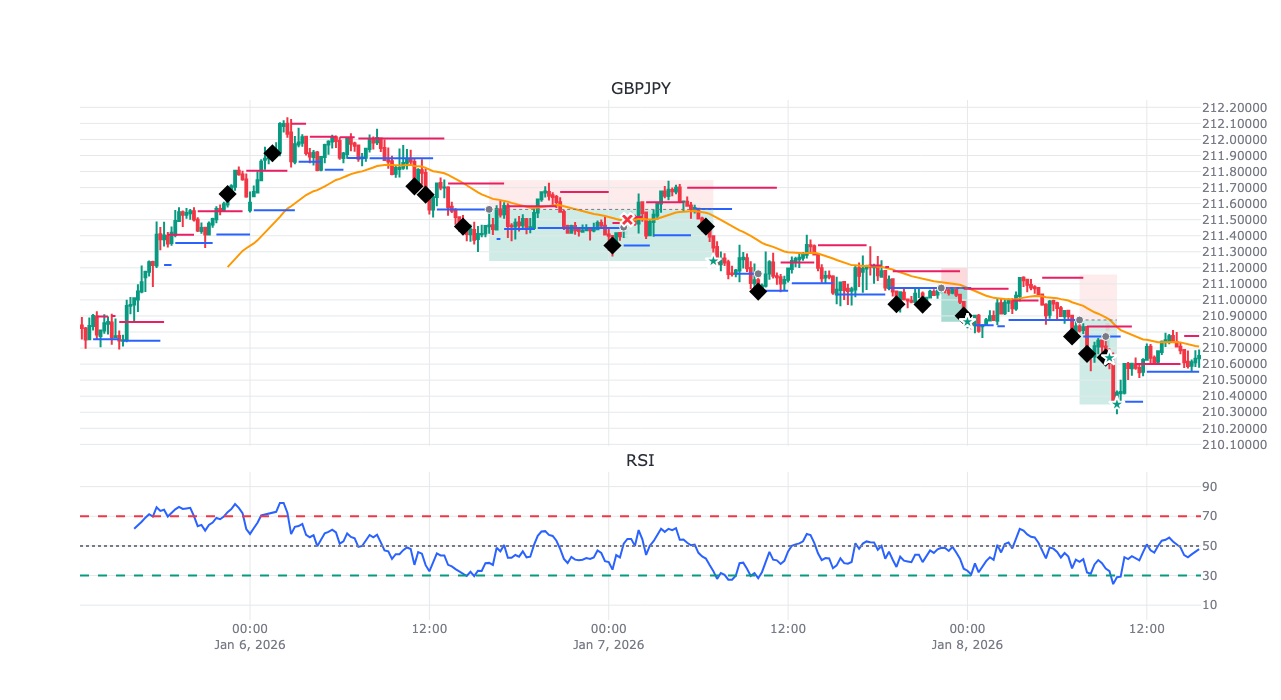

In [8]:
import sys
import os
from datetime import datetime
from dotenv import load_dotenv
original_stdout = sys.stdout
original_stderr = sys.stderr
# sys.stdout = open(os.devnull, 'w')
# sys.stderr = open(os.devnull, 'w')
dotenv_path = os.path.abspath(os.path.join("..", ".env"))
load_dotenv(dotenv_path)

os.environ['ZONE_INVERSION_MARGIN_MICROPIPS'] = '110'  # Zones Tuning
os.environ['BREAKOUT_MIN_STRENGTH_MICROPIPS'] = '100'  # Breakout Tuning
os.environ['MIN_RISK_DISTANCE_MICROPIPS'] = '0.001'

notebook_dir = os.getcwd()
if os.path.basename(notebook_dir) == "notebooks":
    parent_dir = os.path.abspath("..")
    if parent_dir not in sys.path:
        sys.path.insert(0, parent_dir)
from src.utils.config import Config
from src.models.timeframe import Timeframe
from src.utils.plot import plotly_plot
from main import backtesting

Config.show_debug_logs = True
# Tuning
# Config.zone_inversion_margin_micropips = 0 # Zones Tuning
# Config.breakout_min_strength_micropips = 100 # Breakout Tuning: We to break at least X amount of micropips in order to consider a breakout as valid
# Config.min_risk_distance_micropips = 0 


max_candles = 300
symbols = ['GBPJPY']
timeframe = Timeframe.M15
start_date = datetime(2025, 12, 1, 13, 10, 0)
end_date = datetime.now()

res = backtesting(
        symbols=symbols,
        timeframe=timeframe,
        start_date=start_date,
        end_date=end_date,
        max_candles=max_candles)

for symbol_index, (symbol, pair_data) in enumerate(res['data'].items()):
    plotly_plot(res['cerebro'], pair_data, symbol, symbol_index=symbol_index, height=700)